<a href="https://colab.research.google.com/github/dudaribeiro7/intro_modelagem_computacional_UFJF/blob/main/%5BMAC024%5D_T3_2022_1_Grupo_G3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Identificação da Equipe

Equipe G3:

1. Camila Ribeiro Passos
2. Felipe da Costa Pinto Vilela
3. Maria Eduarda Ribeiro Facio

# Condições Gerais

Segundo trabalho de Introdução a Modelagem Computacional

## Da formação das equipes

1. As equipes serão formadas com até e 4 integrantes. 

2. Um dos integrantes será indentificado como correspondente responsável pela entrega do documentos necessários. Toda a comunicação com a equipe será feita por intermédio do correspondente.

3. As equipes devem ser formadas até às **18 horas o dia 15/08/2022** por meio do preenchimento da planilha [[MAC024] Composição das Equipes](https://docs.google.com/spreadsheets/d/1-7Wdno82aFGgCfY0z8oU5SCbwnbN_JV_LqB_ORGKHZQ/edit#gid=300369072).

4. A formação das equipes pode ser acompanhada arquivo [[MAC024] Composição das Equipes](https://docs.google.com/spreadsheets/d/1-7Wdno82aFGgCfY0z8oU5SCbwnbN_JV_LqB_ORGKHZQ/edit#gid=300369072). Cada equipe será indentificada por uma letra em ordem alfabética seguida do número 1 (A3, B3, C3, e assim por diante). O arquivo está aberto para edição e pode ser alterado pelos alunos até a data estipulada.

5. ***Os trabalhos serão atribuídos após a formação das equipe e somente ao correspondente que ficará responsável por repassar as informações demais aos integrantes.***

6. Para que seja feita a atribuição o mais rápido possível, assim que a equipe for formada o correspondente deve enviar um email para **leonardo.goliatt@ufjf.br** com o título *Criação da equipe X3* onde *X* é a identificação da equipe.

## Da avaliação

7. A avaliação será realizada por meio da entrega de um relatório com a contextualização da solução, explicação do desenvolvimento e os códigos desenvolvidos até a data estipulada.
 - O notebook do enunciado deverá ser usado para entrega do relatório
 - Cada questão deve conter a proposta de solução, com a explicação da metodologia empregada na solução
 
7. Os documentos necessários para a entrega do trabalho são (1) um relatório com a explicação das soluções e (2) os códigos desenvolvidos pela equipe. 
A equipe deve usar este modelo de notebook para desenvolver os códigos. Os pontos (1) e (2) podem ser entregues no notebook de enunciado.

9. A distribuição da pontuacão referente a cada ítem aparece no enunciado de 
cada proposicão.


## Dos prazos

10. A equipe deve indicar no arquivo [[MAC024] Composição das Equipes](https://docs.google.com/spreadsheets/d/1-7Wdno82aFGgCfY0z8oU5SCbwnbN_JV_LqB_ORGKHZQ/edit#gid=300369072) um responsável pela entrega do projeto.   Qualquer outro integrante da equipe não poderá entregar o trabalho exceto em casos de força maior.

11. A entrega dos projetos (relatórios e códigos) deve ocorrer até às **23:59 do dia 18/08/2022** na plataforma da disciplina pelo responsável pela entrega.

12. Entregas realizadas após a data estipulada terão a nota da avaliação multiplicada por um coeficiente de **0.80**, cumulativo com os coeficientes de outros atrasos caso ocorram.


## Disposições finais
13. Quaiquer dúvidas ou esclarecimentos devem ser encaminhadas pela sala de aula virtual.

#  Q1 (100 pontos)





Usnado o ambiente Open AI Gym, desenvolva uma política para o problema [Mountain Car Continuous](https://www.gymlibrary.ml/environments/classic_control/mountain_car_continuous/)

Siga os passos abaixo:
1. Descreva o ambiente
2. Descreva as ações
3. Descreva os possiveis estados (observações)
4. Defina a recompensa
5. Descreva as condições para o término do episódio
6. Justifique a politica adotada
7. Apresente o resultado por meio de video


# **Mountain Car Continuous**

**Description:**

      Mountain Car Continuousconsists of a car placed stochastically at the bottom of a sinusoidal valley, with the only possible actions being the accelerations that can be applied to the car in either direction. 
      The goal of the MDP is to strategically accelerate the car to reach the goal state on top of the right hill.
       There are two versions of the mountain car domain in gym: one with discrete actions and one with continuous. This version is the one with continuous actions.

**Observation:**

        Type: Box(2)

        Num    Observation               Min            Max
        0      Car Position              -1.2           0.6
        1      Car Velocity              -0.07          0.07
**Actions:**

        The action is a ndarray with shape (1,), representing the directional force applied on the car. 
        The action is clipped in the range [-1,1] and multiplied by a power of 0.0015.

**Reward:**

        A negative reward of -0.1 * action2 is received at each timestep to penalise for taking actions of large magnitude. 
        If the mountain car reaches the goal then a positive reward of +100 is added to the negative reward for that timestep.


**Starting State:**

         The position of the car is assigned a uniform random value in [-0.6 , -0.4].
         The starting velocity of the car is always assigned to 0.

**Episode Termination:**

         The car position is more than 0.45
         Episode length is greater than 999


Instalando os componentes para execução do código

In [ ]:
# Instalação dos pacotes 
!pip install gym > /dev/null 2>&1
!pip install box2d-py > /dev/null 2>&1
!apt-get install python-opengl -y > /dev/null 2>&1
!apt install xvfb -y > /dev/null 2>&1
!pip install pyvirtualdisplay > /dev/null 2>&1
!pip install piglet > /dev/null 2>&1
!sudo pip3 install imageio==2.4.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Importando os pacotes

In [ ]:
import gym # importando o pacote

# funções apenas para renderizar o ambiente
from pyvirtualdisplay import Display
Display().start()
from IPython import display
import matplotlib.pyplot as plt
%matplotlib inline

import os
import cv2
import numpy as np
from tqdm import tqdm
from moviepy.editor import *
import random
import numpy as np
import pylab as pl

# Politica aleatória

In [ ]:
env = gym.make('MountainCarContinuous-v0') #Criando o ambiente
state = env.reset()

rewards = []
done = False
frames = []

while not done:
  frames.append(env.render('rgb_array'))
  action = env.action_space.sample() # política aleatória
  state, reward, done, info = env.step(action)
  rewards.append(reward)
  
env.close()

In [ ]:
sum(rewards)

-32.89078398463819

In [ ]:
save_path = "/content/video.mp4"

fps = 25
height, width, layers=frames[0].shape

video = cv2.VideoWriter(save_path, cv2.VideoWriter_fourcc(*'MP4V'), fps, (width,height))
for frame in frames:
    video.write(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
cv2.destroyAllWindows()
video.release()

clip=VideoFileClip(save_path)
clip.ipython_display(width=500)

100%|█████████▉| 999/1000 [00:06<00:00, 146.07it/s]


# Proposta de Solução

In [ ]:
num_episodes = 100
rewards = []

for i_episode in tqdm(range(num_episodes)):
    done = False
    state = env.reset()
    reward = []
    while not done:
        action = env.action_space.sample()
        state, r, done, info = env.step(action)
        reward.append(r)
    env.close()
    rewards.append(sum(reward))

100%|██████████| 100/100 [00:08<00:00, 11.63it/s]


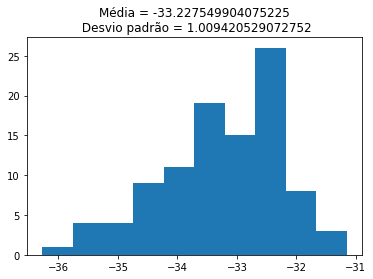

In [ ]:
rewards = np.array(rewards)
pl.hist(rewards)
pl.title('Média = '+str(rewards.mean())+'\n Desvio padrão = '+str(rewards.std()))
pl.show()

In [ ]:
def politica(state):
  car_pos, car_vel = state
  if car_pos > -0.43:
    if car_vel >= 0:
      v = 0.8
    else:
      v = -0.8
  else:
    if car_pos > -0.5:
      if car_vel >= 0:
        v = 0.6
      else:
        v = -0.6
    else:
      if car_pos > -0.6:
        if car_vel < 0:
          v = -0.5
        else:
          v = -0.5
      else:
        if car_vel >= 0:
          v = 0.5
        else:
          v = -0.4
  return np.array([v])
 

In [ ]:
env = gym.make('MountainCarContinuous-v0') # criando o ambiente
np.random.seed()
state = env.reset()

print('Estado Inicial:')
print(' - Posição:', state[0])
print(' - Velocidade:', state[1])

rewards = []
done = False
frames = []

while not done:
  frames.append(env.render('rgb_array'))
  action = politica(state) # politica para o agente
  state, reward, done, info = env.step(action)
  rewards.append(reward)
  
env.close()

print('Recompensa final obtida:', sum(rewards))

Estado Inicial:
 - Posição: -0.47154141313990605
 - Velocidade: 0.0
Recompensa final obtida: 94.422


In [ ]:
save_path = "/content/video.mp4"

fps = 25
height, width, layers=frames[0].shape

video = cv2.VideoWriter(save_path, cv2.VideoWriter_fourcc(*'MP4V'), fps, (width,height))
for frame in frames:
    video.write(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
cv2.destroyAllWindows()
video.release()

clip=VideoFileClip(save_path)
clip.ipython_display(width=500)

 99%|█████████▉| 126/127 [00:00<00:00, 313.90it/s]


**Justificativa:**

      Adotamos a politica de continuar acelerando o carrinho na mesma direção que ele esteja seguindo. 
      Dessa forma, incrementamos a aceleração a medida que ele desce para ambas as direções.